In [1]:
import igraph as ig
import numpy as np
import pandas as pd
from IPython.core.display import display, SVG
import matplotlib.pyplot as plt
import umap
from scipy.special import comb as choose
import scipy.stats as ss
from itertools import groupby


## Erdos-Renyi (ER) Models

random models for graphs

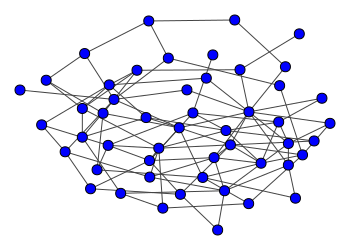

In [2]:
## The G(n,m) model
n = 50
m = 100
g = ig.Graph.Erdos_Renyi(n=n, m=m, directed=False, loops=False)
g.vs['color'] = 'blue'
g.vs['size'] = 10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))

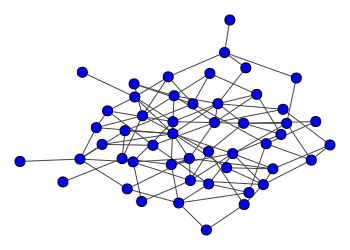

In [3]:
## The G(n,p) model
p = m/choose(n,2) ## as in previous model
g = ig.Graph.Erdos_Renyi(n=n, p=p, directed=False, loops=False)
g.vs['color'] = 'blue'
g.vs['size'] = 10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))

In [4]:
print('number of edges:',g.ecount(),' expected:',np.around(choose(n,2)*p,2))
print('avg degree:',np.mean(g.degree()),' expected:',np.around(p*(n-1),2))


number of edges: 104  expected: 100.0
avg degree: 4.16  expected: 4.0


## Degree distribution

In [5]:
## larger graph - looking at the degree distribution
n = 1000
p = .01 
g = ig.Graph.Erdos_Renyi(n=n, p=p, directed=False, loops=False)
m = g.ecount()
print('number of edges:',g.ecount(),' expected:',np.around(choose(n,2)*p,2))
print('avg degree:',np.mean(g.degree()),' expected:',np.around(p*(n-1),2))


number of edges: 4915  expected: 4995.0
avg degree: 9.83  expected: 9.99


In [6]:
print(g.degree_distribution())


N = 1000, mean +- sd: 9.8300 +- 3.2083
Each * represents 2 items
[ 2,  3): * (3)
[ 3,  4): **** (8)
[ 4,  5): ************* (27)
[ 5,  6): ****************** (37)
[ 6,  7): ************************************** (77)
[ 7,  8): ******************************************** (88)
[ 8,  9): ********************************************************* (115)
[ 9, 10): *************************************************************** (126)
[10, 11): ************************************************************* (122)
[11, 12): ***************************************************** (107)
[12, 13): ************************************************** (100)
[13, 14): *********************************** (70)
[14, 15): ********************* (43)
[15, 16): ************** (28)
[16, 17): *********** (22)
[17, 18): **** (8)
[18, 19): ***** (11)
[19, 20): * (3)
[20, 21): * (3)
[21, 22):  (1)
[22, 23):  (1)


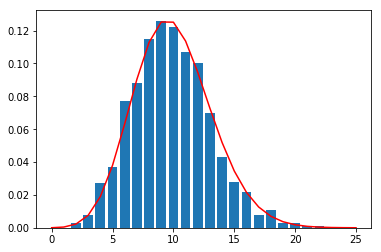

In [7]:
## histogram
deg = np.sort(g.degree())
freq = [len(list(group))/len(deg) for key, group in groupby(deg)]
deg = np.unique(deg)
plt.bar(deg,freq)

## compare with Poisson distribution
lam = p*(n-1)
rv = ss.poisson(lam)
x = np.arange(0,26,1)
plt.plot(x, rv.pmf(x),c='r');

## Adjacency matrix

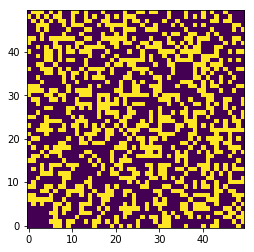

In [8]:
g = ig.Graph.Erdos_Renyi(n=50,m=500)
adj = g.get_adjacency()
A = adj.data
plt.imshow(A, origin='lower' );

## Minimum spanning tree, diameter

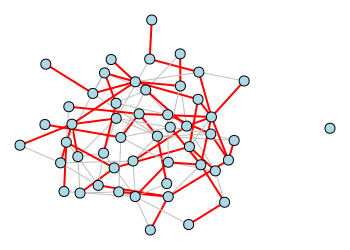

In [9]:
g = ig.Graph.Erdos_Renyi(n=50, m=100)
g.vs['size']=10
g.vs['color']='lightblue'
e = g.spanning_tree(return_tree=False)
g.es['color'] = 'grey'
g.es['width'] = 1
for x in e:
    g.es[x]['color'] = 'red'
    g.es[x]['width'] = 2
ig.plot(g, layout="fr", vertex_label=None, bbox=(0,0,350,250))


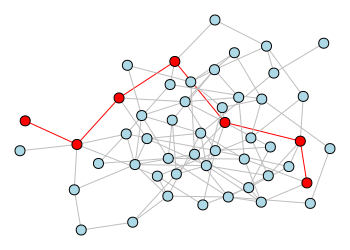

In [10]:
## diameter
g = ig.Graph.Erdos_Renyi(n=50, m=100)
v = g.get_diameter()
g.vs['size']=10
g.vs['color']='lightblue'
g.es['color'] = 'grey'
for x in v:
    g.vs[x]['color'] = 'red'
for first, second in zip(v, v[1:]):
    g.es[g.get_eid(first, second)]['color'] = 'red'

ig.plot(g, layout="fr", vertex_label=None, bbox=(0,0,350,250))


## Connected components

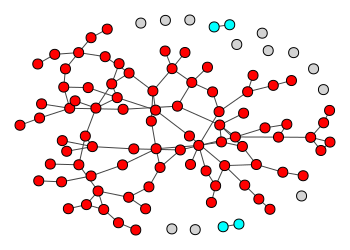

In [11]:
g = ig.Graph.Erdos_Renyi(n=100, m=100)
g.vs['size']=10
colors = ["lightgray", "cyan", "magenta", "yellow", "blue", "green", "red"]
for component in g.components():
  color = colors[min(6, len(component)-1)]
  for vidx in component: g.vs[vidx]["color"] = color
ig.plot(g, layout="fr", vertex_label=None, bbox=(0,0,350,250))


## Large connected component


In [12]:
## avg degree k = p(n-1)
n = 1000
gcs = []
x = np.arange(.1,10.01,.1)
for k in x:
    p = k/(n-1)
    g = ig.Graph.Erdos_Renyi(n=n, p=p, directed=False, loops=False)
    gcs.append(g.clusters().giant().vcount())

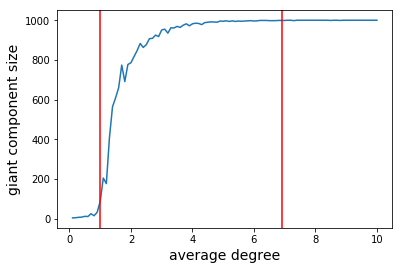

In [13]:
plt.plot(x,gcs)
plt.axvline(1,c='r')         ## critical point
plt.axvline(np.log(n),c='r') ## connected regime
plt.xlabel('average degree',fontsize=14)
plt.ylabel('giant component size',fontsize=14);

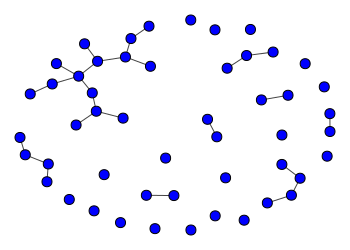

In [14]:
## looking at a smaller graph: subcritical regime
n = 50
k = .9 ## avg degree
p = k/(n-1)
g = ig.Graph.Erdos_Renyi(n=n, p=p, directed=False, loops=False)
g.vs['color'] = 'blue'
g.vs['size'] = 10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))


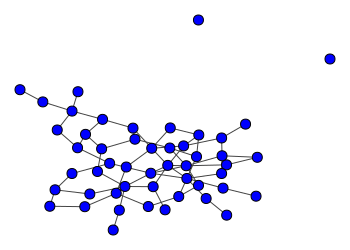

In [15]:
## looking at a smaller graph: supercritical regime
n = 50
k = np.log(n)-1 ## avg degree
p = k/(n-1)
g = ig.Graph.Erdos_Renyi(n=n, p=p, directed=False, loops=False)
g.vs['color'] = 'blue'
g.vs['size'] = 10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))


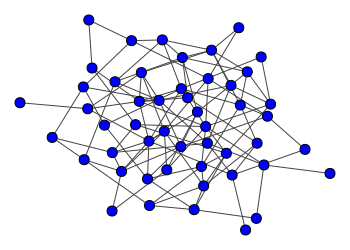

In [16]:
## looking at a smaller graph: connected regime
n = 50
k = np.log(n)+1
p = k/(n-1)
g = ig.Graph.Erdos_Renyi(n=n, p=p, directed=False, loops=False)
g.vs['color'] = 'blue'
g.vs['size'] = 10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))


## Other characteristics

In [17]:
n = 500
k = np.log(n) ## avg degree
p = k/(n-1)
g = ig.Graph.Erdos_Renyi(n=n, p=p, directed=False, loops=False)
print('avg degree:',k)

avg degree: 6.214608098422191


In [18]:
## characteristic path length
print('avg path length:',g.average_path_length(),' approx:',np.log(n)/np.log(p*(n-1)))

avg path length: 3.6002285695889773  approx: 3.401718228036341


In [19]:
## assortativity close to 0
print('assortativity:',g.assortativity_degree())

assortativity: -0.02204449996484694


# Degree sequence models

* Random graphs following some degree distribution
* Configuration model considers a fixed sequence of degrees
* Chung-Lu is a probabilistic model

In [20]:
## Configuration model - here with fixed degrees
d = [x+5 for x in np.random.choice(1,size=50)]
g = ig.Graph.Degree_Sequence(d)

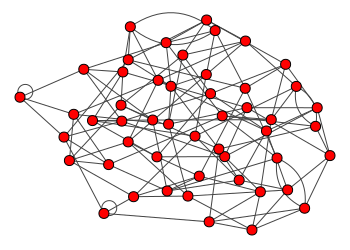

In [21]:
g.vs['size']=10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))


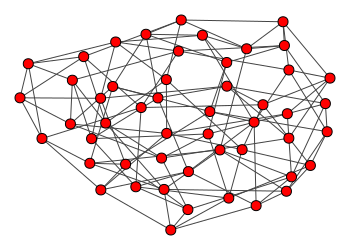

In [22]:
## we can ignore multi-edges
g = ig.Graph.Degree_Sequence(d, method="no_multiple")
g.vs['size']=10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))


In [23]:
## uniform degree distribution
s = 1
while s % 2 == 1:
    d = [x+2 for x in np.random.choice(5,size=50)]
    s = sum(d) ## should be even!
g = ig.Graph.Degree_Sequence(d)
print(g.degree_distribution()) 

N = 50, mean +- sd: 4.3200 +- 1.5964
[2, 3): *********** (11)
[3, 4): ****** (6)
[4, 5): ******* (7)
[5, 6): ******** (8)
[6, 7): ****************** (18)


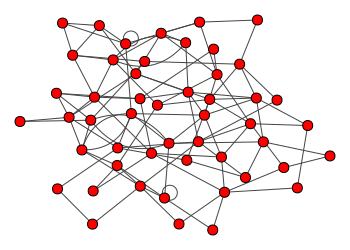

In [24]:
g.vs['size']=10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))


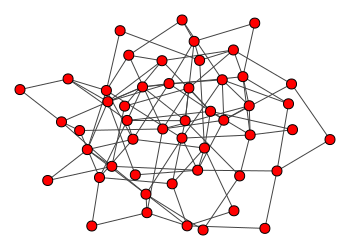

In [25]:
g = ig.Graph.Degree_Sequence(d, method="no_multiple")
g.vs['size']=10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))


In [26]:
print(g.degree_distribution())

N = 50, mean +- sd: 4.3200 +- 1.5964
[2, 3): *********** (11)
[3, 4): ****** (6)
[4, 5): ******* (7)
[5, 6): ******** (8)
[6, 7): ****************** (18)


## Chung-Lu model

In [27]:
def CL(d):
    m = np.sum(d)//2
    n = len(d)
    s = np.sum(d)
    p = [i/s for i in d]
    g = ig.Graph.Erdos_Renyi(n=n, m=0)
    while g.ecount() < m:
        e = np.random.choice(n, size=2, replace=False, p=p)
        g.add_edge(e[0],e[1])
    g.simplify()
    return g

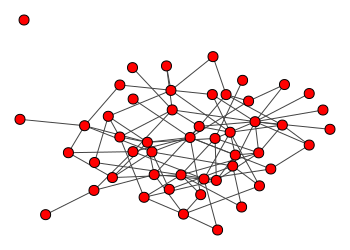

In [28]:
## exp. degree 2-6
d = [x+2 for x in np.random.choice(5,size=50)]
g = CL(d)
g.vs['size']=10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))


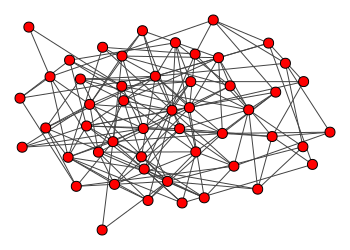

In [29]:
## exp. degree 5-9
d = [x+5 for x in np.random.choice(5,size=50)]
g = CL(d)
g.vs['size']=10
ly = g.layout("kk")  ## kamada-kawai; usually nice
ig.plot(g, layout=ly, bbox=(0,0,350,250))


In [30]:
print(g.degree_distribution())

N = 50, mean +- sd: 6.6400 +- 2.6167
[ 2,  3): ** (2)
[ 3,  4): * (1)
[ 4,  5): ******* (7)
[ 5,  6): ********* (9)
[ 6,  7): ********** (10)
[ 7,  8): *** (3)
[ 8,  9): ****** (6)
[ 9, 10): ***** (5)
[10, 11): **** (4)
[11, 12): * (1)
[12, 13): * (1)
[13, 14):  (0)
[14, 15):  (0)
[15, 16): * (1)


In [31]:
print('mean degree:',np.mean(d),' avg degree in g:',np.mean(g.degree()))

mean degree: 7.06  avg degree in g: 6.64
